In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os

In [17]:
tf.config.threading.set_intra_op_parallelism_threads(2)
tf.config.threading.set_inter_op_parallelism_threads(2)


In [18]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [19]:
# Data parameters
data_dir = r"D:\images download\New folder\working\Image-Sentiment-Analysis-master\blanced - no natural"
img_size = (224, 224)
batch_size = 64

In [20]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [21]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 1394 images belonging to 2 classes.


In [22]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 348 images belonging to 2 classes.


In [23]:
# Class weights calculation
class_counts = [845, 897]  # Replace with actual counts if different
class_weights = {
    0: sum(class_counts)/class_counts[0],
    1: sum(class_counts)/class_counts[1]
}


In [24]:
# Model architecture
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

In [25]:
base_model.trainable = False  # Freeze base model

In [26]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, outputs)


In [27]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [28]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [29]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [30]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5242 - loss: 1.6061 - precision: 0.5428 - recall: 0.4495

21/21 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5259 - loss: 1.6023 - precision: 0.5449 - recall: 0.4518 - val_accuracy: 0.6187 - val_loss: 0.6571 - val_precision: 0.6408 - val_recall: 0.4371
Epoch 2/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6562 - loss: 1.3465 - precision: 0.6486 - recall: 0.7273

D:\anaconda\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.6562 - loss: 1.3465 - precision: 0.6486 - recall: 0.7273 - val_accuracy: 0.6125 - val_loss: 0.6632 - val_precision: 0.6311 - val_recall: 0.4305
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6382 - loss: 1.3351 - precision: 0.6311 - recall: 0.6371

21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6386 - loss: 1.3351 - precision: 0.6327 - recall: 0.6362 - val_accuracy: 0.6406 - val_loss: 0.6563 - val_precision: 0.8214 - val_recall: 0.3046
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 385ms/step - accuracy: 0.7031 - loss: 1.1058 - precision: 0.8065 - recall: 0.6579 - val_accuracy: 0.6250 - val_loss: 0.6333 - val_precision: 0.7541 - val_recall: 0.3046
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6973 - loss: 1.1853 - precision: 0.6896 - recall: 0.7432 - val_accuracy: 0.6281 - val_loss: 0.6551 - val_precision: 0.9211 - val_recall: 0.2318
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.8594 - loss: 0.7845 - precision: 0.8710 - recall: 0.8438 - val_accuracy: 0.6000 - val_loss: 0.6893 - val_precision: 0.8108 - val_recall: 0.1987
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7245 - loss: 1.1032 - precision: 0.7255 - recall: 0.7148

21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7245 - loss: 1.1024 - precision: 0.7258 - recall: 0.7154 - val_accuracy: 0.6438 - val_loss: 0.6587 - val_precision: 0.8776 - val_recall: 0.2848
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step - accuracy: 0.8281 - loss: 0.8824 - precision: 0.8485 - recall: 0.8235 - val_accuracy: 0.6062 - val_loss: 0.6950 - val_precision: 0.7907 - val_recall: 0.2252
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7760 - loss: 1.0141 - precision: 0.7823 - recall: 0.7836 - val_accuracy: 0.6125 - val_loss: 0.7350 - val_precision: 0.9091 - val_recall: 0.1987
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 410ms/step - accuracy: 0.7031 - loss: 1.1145 - precision: 0.6667 - recall: 0.5926 - val_accuracy: 0.6125 - val_loss: 0.7146 - val_precision: 0.8462 - val_recall: 0.2185
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7520 - loss: 0.9966 - precision: 0.7706 - recall: 0.7353 - val_accuracy: 0.6250 - val_loss: 0.7048 - val_pre

In [31]:
# Evaluation
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

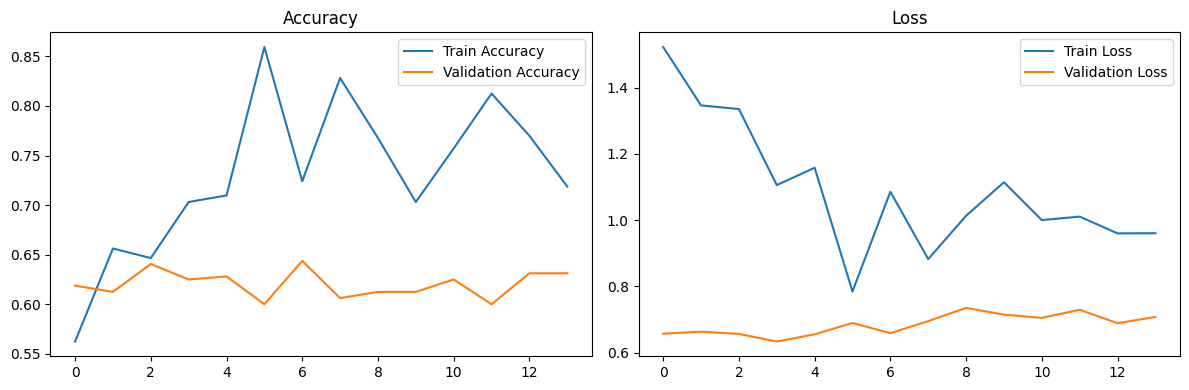

In [32]:
plot_training_history(history)

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from keras.preprocessing import image


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


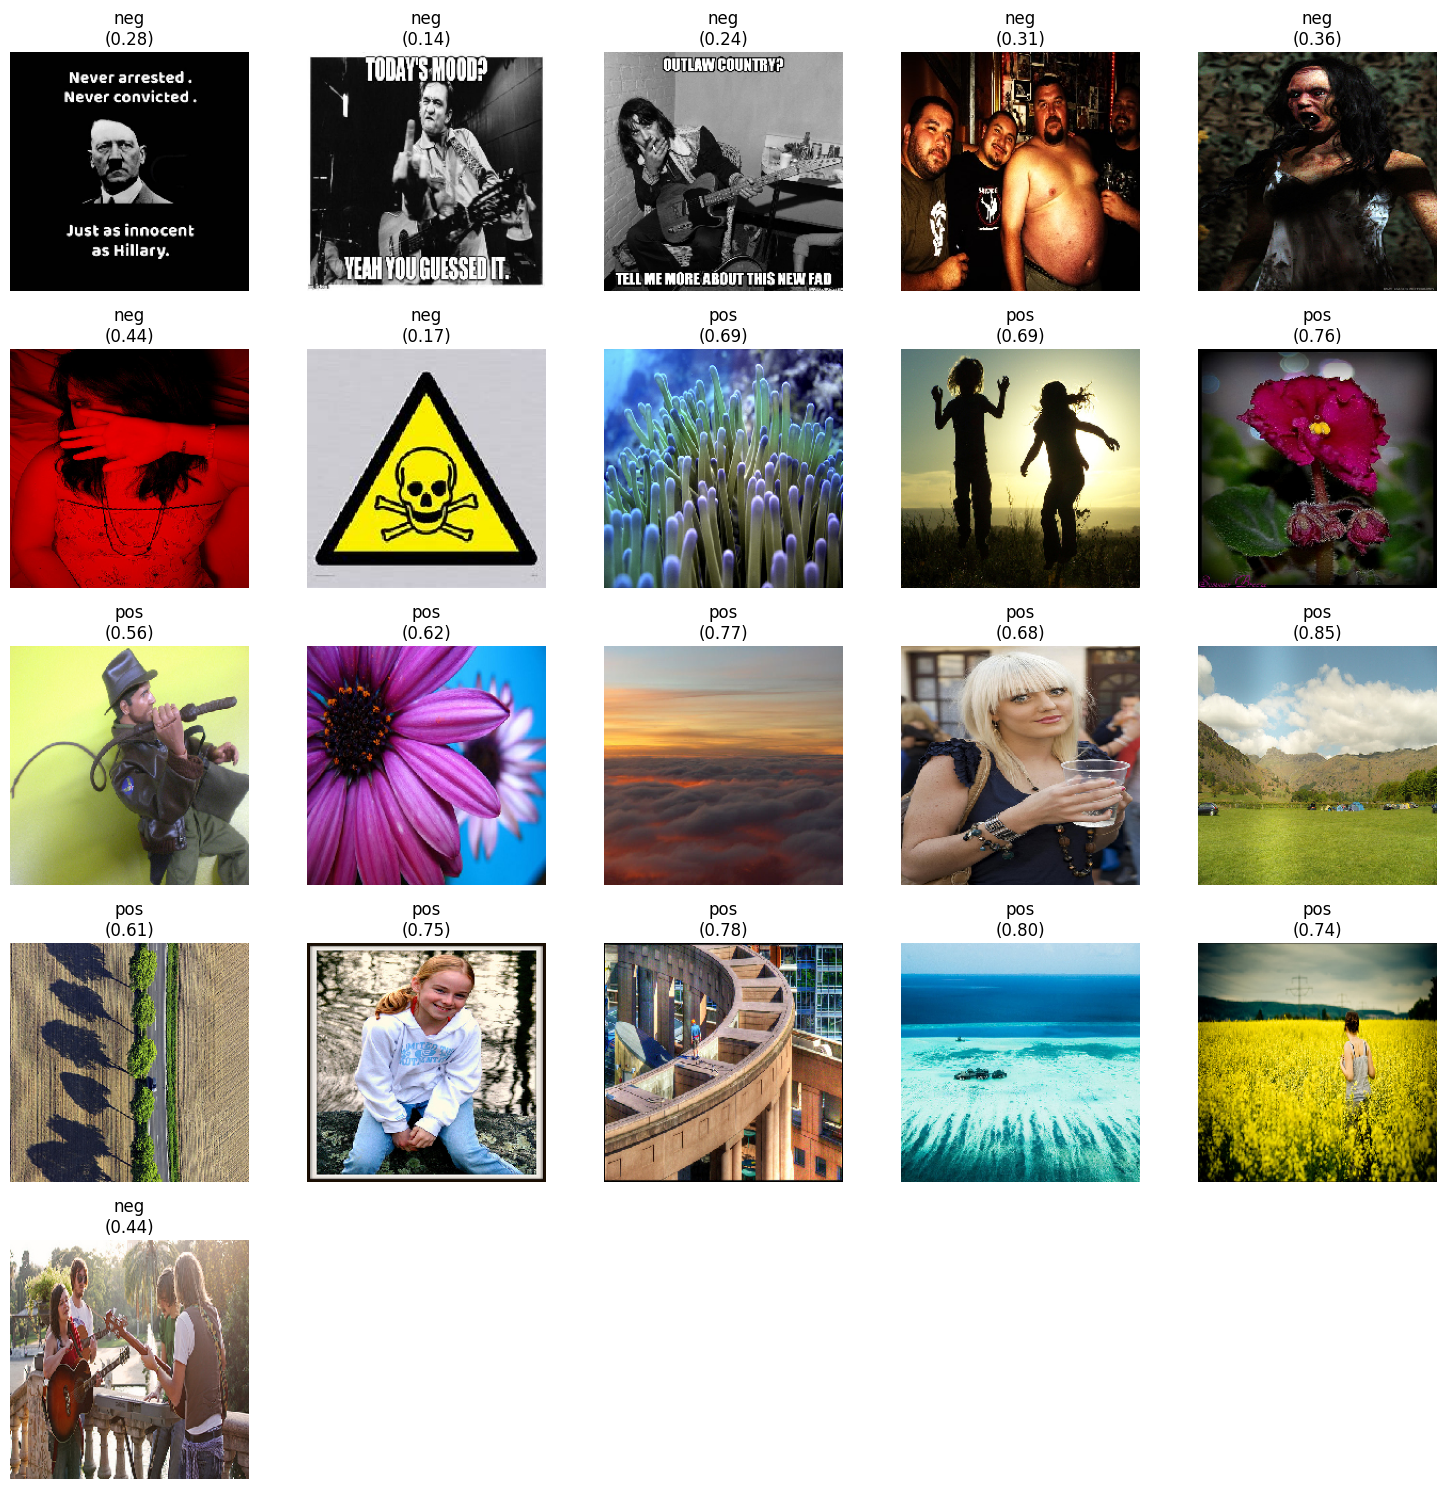


Prediction Summary:
neg: 8 images
pos: 13 images


In [35]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# Define the test image directory (update with your actual path)
test_images_path = r"D:\images download\New folder\working\Image-Sentiment-Analysis-master\tested\t2 7x7x7"

# Get class mapping from training generator
class_mapping = {v: k for k, v in train_generator.class_indices.items()}

# Get a list of image filenames
file_names = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Initialize list to store images
img_list = []

# Loop through the files, load and preprocess each image
for file in file_names:
    try:
        img_path = os.path.join(test_images_path, file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Match training preprocessing
        img_list.append(img_array)
    except Exception as e:
        print(f"Error loading {file}: {str(e)}")
        continue

if not img_list:
    print("No valid images found in directory!")
else:
    # Convert list to numpy array
    X_test = np.array(img_list)

    # Make predictions
    predictions = model.predict(X_test)
    
    # Convert probabilities to class labels (0 or 1)
    predicted_classes = (predictions > 0.5).astype(int).flatten()
    
    # Create figure with dynamic size based on number of images
    num_images = len(X_test)
    cols = 5
    rows = math.ceil(num_images / cols)
    
    plt.figure(figsize=(cols*3, rows*3))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(X_test[i])
        plt.title(f"{class_mapping[predicted_classes[i]]}\n({predictions[i][0]:.2f})")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Print class distribution
    unique, counts = np.unique(predicted_classes, return_counts=True)
    print("\nPrediction Summary:")
    for cls, count in zip(unique, counts):
        print(f"{class_mapping[cls]}: {count} images")

Found 494 images belonging to 2 classes.


D:\anaconda\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step

Classification Report:
              precision    recall  f1-score   support

         neg       0.63      0.61      0.62       185
         pos       0.77      0.78      0.78       309

    accuracy                           0.72       494
   macro avg       0.70      0.69      0.70       494
weighted avg       0.71      0.72      0.72       494



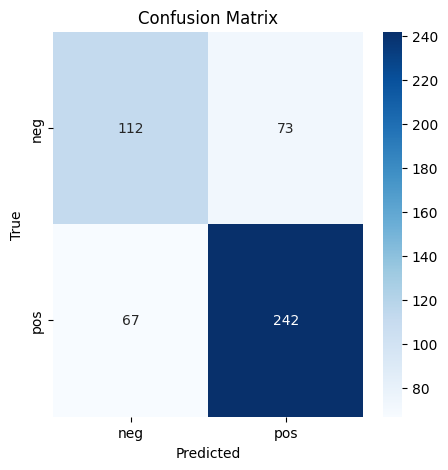

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set test directory (should have subdirectories 'neg' and 'pos')
test_dir = r"D:\images download\New folder\working\Image-Sentiment-Analysis-master\tested\test dir"

# Create test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False  # Important for correct label order
)

# Get true labels
y_true = test_generator.classes

# Make predictions
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_mapping.values()))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_mapping.values(), 
           yticklabels=class_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualization of sample predictions (from previous code)
# ... [keep your existing visualization code here] ...

# enhanced


In [37]:
def create_enhanced_model():
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    
    # Make last 20% of layers trainable
    base_model.trainable = True
    for layer in base_model.layers[:int(len(base_model.layers)*0.8)]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [38]:
enhanced_model = create_enhanced_model()

In [39]:
#  Hyperparameter Configuration
LR_START = 1e-5
LR_MAX = 1e-4
LR_MIN = 1e-6
LR_RAMPUP_EPOCHS = 10
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = 0.8

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

In [40]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

In [41]:
# Cell 3: Model Compilation
enhanced_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [42]:
# Cell 4: Enhanced Training Callbacks
enhanced_checkpoint = ModelCheckpoint(
    'enhanced_model.h5',
    save_best_only=True,
    monitor='val_auc',
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [43]:
# Cell 5: Model Training
enhanced_history = enhanced_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=40,
    class_weight=class_weights,
    callbacks=[early_stopping, enhanced_checkpoint, lr_scheduler]
)


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4877 - auc: 0.4713 - loss: 1.7015 - precision: 0.5444 - recall: 0.2315

21/21 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.4884 - auc: 0.4730 - loss: 1.6974 - precision: 0.5443 - recall: 0.2329 - val_accuracy: 0.5656 - val_auc: 0.5926 - val_loss: 0.6842 - val_precision: 0.5968 - val_recall: 0.2450 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.9e-05.
Epoch 2/40
 1/21 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5625 - auc: 0.5355 - loss: 1.4559 - precision: 0.5385 - recall: 0.2414

D:\anaconda\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.5625 - auc: 0.5355 - loss: 1.4559 - precision: 0.5385 - recall: 0.2414 - val_accuracy: 0.5437 - val_auc: 0.5665 - val_loss: 0.6974 - val_precision: 0.5472 - val_recall: 0.1921 - learning_rate: 1.9000e-05

Epoch 3: LearningRateScheduler setting learning rate to 2.8000000000000003e-05.
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5708 - auc: 0.5789 - loss: 1.4371 - precision: 0.5846 - recall: 0.4708

21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5706 - auc: 0.5796 - loss: 1.4358 - precision: 0.5850 - recall: 0.4729 - val_accuracy: 0.6313 - val_auc: 0.6360 - val_loss: 0.6645 - val_precision: 0.6170 - val_recall: 0.5762 - learning_rate: 2.8000e-05

Epoch 4: LearningRateScheduler setting learning rate to 3.7e-05.
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.5625 - auc: 0.5074 - loss: 1.5790 - precision: 0.5357 - recall: 0.5000 - val_accuracy: 0.5688 - val_auc: 0.5961 - val_loss: 0.6760 - val_precision: 0.5474 - val_recall: 0.4967 - learning_rate: 3.7000e-05

Epoch 5: LearningRateScheduler setting learning rate to 4.6e-05.
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6086 - auc: 0.6497 - loss: 1.3418 - precision: 0.6283 - recall: 0.6146

21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6096 - auc: 0.6508 - loss: 1.3401 - precision: 0.6289 - recall: 0.6155 - val_accuracy: 0.6625 - val_auc: 0.7217 - val_loss: 0.6238 - val_precision: 0.7263 - val_recall: 0.4570 - learning_rate: 4.6000e-05

Epoch 6: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 6/40
 1/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6406 - auc: 0.6725 - loss: 1.2895 - precision: 0.7200 - recall: 0.5294

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 459ms/step - accuracy: 0.6406 - auc: 0.6725 - loss: 1.2895 - precision: 0.7200 - recall: 0.5294 - val_accuracy: 0.6719 - val_auc: 0.7404 - val_loss: 0.6170 - val_precision: 0.7556 - val_recall: 0.4503 - learning_rate: 5.5000e-05

Epoch 7: LearningRateScheduler setting learning rate to 6.4e-05.
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6752 - auc: 0.7446 - loss: 1.1974 - precision: 0.7028 - recall: 0.6167

21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6766 - auc: 0.7460 - loss: 1.1951 - precision: 0.7042 - recall: 0.6190 - val_accuracy: 0.6750 - val_auc: 0.7489 - val_loss: 0.6027 - val_precision: 0.7765 - val_recall: 0.4371 - learning_rate: 6.4000e-05

Epoch 8: LearningRateScheduler setting learning rate to 7.3e-05.
Epoch 8/40
 1/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8281 - auc: 0.9018 - loss: 0.9340 - precision: 0.9091 - recall: 0.7895

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 401ms/step - accuracy: 0.8281 - auc: 0.9018 - loss: 0.9340 - precision: 0.9091 - recall: 0.7895 - val_accuracy: 0.7094 - val_auc: 0.8054 - val_loss: 0.5598 - val_precision: 0.8085 - val_recall: 0.5033 - learning_rate: 7.3000e-05

Epoch 9: LearningRateScheduler setting learning rate to 8.2e-05.
Epoch 9/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7722 - auc: 0.8357 - loss: 1.0087 - precision: 0.7940 - recall: 0.7851

21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7723 - auc: 0.8365 - loss: 1.0064 - precision: 0.7933 - recall: 0.7853 - val_accuracy: 0.7188 - val_auc: 0.8335 - val_loss: 0.5872 - val_precision: 0.9178 - val_recall: 0.4437 - learning_rate: 8.2000e-05

Epoch 10: LearningRateScheduler setting learning rate to 9.1e-05.
Epoch 10/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 511ms/step - accuracy: 0.8438 - auc: 0.8798 - loss: 0.8756 - precision: 0.8387 - recall: 0.8387 - val_accuracy: 0.7031 - val_auc: 0.8219 - val_loss: 0.6030 - val_precision: 0.8333 - val_recall: 0.4636 - learning_rate: 9.1000e-05

Epoch 11: LearningRateScheduler setting learning rate to 0.0001.
Epoch 11/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7951 - auc: 0.8713 - loss: 0.9088 - precision: 0.8118 - recall: 0.7536

21/21 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7955 - auc: 0.8719 - loss: 0.9069 - precision: 0.8127 - recall: 0.7547 - val_accuracy: 0.7781 - val_auc: 0.8438 - val_loss: 0.5186 - val_precision: 0.8175 - val_recall: 0.6821 - learning_rate: 1.0000e-04

Epoch 12: LearningRateScheduler setting learning rate to 8.020000000000001e-05.
Epoch 12/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.7344 - auc: 0.8588 - loss: 0.9095 - precision: 0.7576 - recall: 0.7353 - val_accuracy: 0.7688 - val_auc: 0.8301 - val_loss: 0.5346 - val_precision: 0.7810 - val_recall: 0.7086 - learning_rate: 8.0200e-05

Epoch 13: LearningRateScheduler setting learning rate to 6.436000000000001e-05.
Epoch 13/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8248 - auc: 0.9061 - loss: 0.7840 - precision: 0.8118 - recall: 0.8692 - val_accuracy: 0.7469 - val_auc: 0.8371 - val_loss: 0.5866 - val_precision: 0.8302 - val_recall: 0.5828 - learning_rate: 6.4360e-05

Epoch 14: LearningRateScheduler setting 

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 0.8281 - auc: 0.9233 - loss: 0.7089 - precision: 0.8571 - recall: 0.7742 - val_accuracy: 0.7594 - val_auc: 0.8444 - val_loss: 0.5452 - val_precision: 0.8364 - val_recall: 0.6093 - learning_rate: 3.3440e-05

Epoch 17: LearningRateScheduler setting learning rate to 2.6952256000000013e-05.
Epoch 17/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8548 - auc: 0.9347 - loss: 0.6564 - precision: 0.8565 - recall: 0.8592 - val_accuracy: 0.7031 - val_auc: 0.7870 - val_loss: 0.6533 - val_precision: 0.7090 - val_recall: 0.6291 - learning_rate: 2.6952e-05

Epoch 18: LearningRateScheduler setting learning rate to 2.176180480000001e-05.
Epoch 18/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.8750 - auc: 0.9451 - loss: 0.6602 - precision: 0.8235 - recall: 0.9333 - val_accuracy: 0.7469 - val_auc: 0.8060 - val_loss: 0.6144 - val_precision: 0.7652 - val_recall: 0.6689 - learning_rate: 2.1762e-05

Epoch 19: LearningRateScheduler sett

In [44]:
# Cell 6: Fixed Fine-Tuning Stage
def prepare_for_fine_tuning(model):
    # Unfreeze all layers
    model.trainable = True
    
    # Recompile with lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=1e-6),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall', 'auc']
    )
    return model

In [45]:
# Load best model from previous training
fine_tuned_model = tf.keras.models.load_model('enhanced_model.h5')
fine_tuned_model = prepare_for_fine_tuning(fine_tuned_model)

In [46]:
# Cell 7: Fixed Fine-Tuning Training
fine_tune_history = fine_tuned_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=25,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8701 - auc: 0.9440 - loss: 0.6247 - precision: 0.8859 - recall: 0.8601 - val_accuracy: 0.7469 - val_auc: 0.8243 - val_loss: 0.5977 - val_precision: 0.8070 - val_recall: 0.6093
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - accuracy: 0.7969 - auc: 0.9256 - loss: 0.7109 - precision: 0.8710 - recall: 0.7500 - val_accuracy: 0.7406 - val_auc: 0.8386 - val_loss: 0.5677 - val_precision: 0.7931 - val_recall: 0.6093
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8790 - auc: 0.9458 - loss: 0.6136 - precision: 0.8952 - recall: 0.8671 - val_accuracy: 0.7406 - val_auc: 0.8176 - val_loss: 0.6235 - val_precision: 0.8036 - val_recall: 0.5960
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - accuracy: 0.8281 - auc: 0.9027 - loss: 0.7586 - precision: 0.8125 - recall: 0.8387 - val_accuracy: 0.7469 - val_auc: 0.8227 - val_loss: 0.5949 - val_precision: 0.7734 - val_recall: 0.6556
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━

# EfficientNetB3

In [47]:
# Cell 8: EfficientNetB3 Model Creation
def create_efficientnet_model():
    base_model = tf.keras.applications.EfficientNetB3(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    
    # Freeze base model initially
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

In [48]:
efficientnet_model = create_efficientnet_model()

In [49]:
# Cell 9: EfficientNet Compilation
efficientnet_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)


In [50]:
# Cell 10: EfficientNet Training
effnet_checkpoint = ModelCheckpoint(
    'effnet_model.h5',
    save_best_only=True,
    monitor='val_auc',
    mode='max'
)


In [51]:
effnet_history = efficientnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stopping, effnet_checkpoint, lr_scheduler]
)


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5016 - auc: 0.4975 - loss: 1.4023 - precision: 0.5129 - recall: 0.6114

21/21 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.5019 - auc: 0.4980 - loss: 1.4020 - precision: 0.5131 - recall: 0.6103 - val_accuracy: 0.5406 - val_auc: 0.5799 - val_loss: 0.6888 - val_precision: 0.5625 - val_recall: 0.1192 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.9e-05.
Epoch 2/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1:04 3s/step - accuracy: 0.5156 - auc: 0.5704 - loss: 1.3703 - precision: 0.5926 - recall: 0.4444

21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 843ms/step - accuracy: 0.5156 - auc: 0.5704 - loss: 1.3703 - precision: 0.5926 - recall: 0.4444 - val_accuracy: 0.5500 - val_auc: 0.5947 - val_loss: 0.6881 - val_precision: 0.6000 - val_recall: 0.1391 - learning_rate: 1.9000e-05

Epoch 3: LearningRateScheduler setting learning rate to 2.8000000000000003e-05.
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4790 - auc: 0.4524 - loss: 1.4197 - precision: 0.5194 - recall: 0.5337 - val_accuracy: 0.5281 - val_auc: 0.5809 - val_loss: 0.6884 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.8000e-05

Epoch 4: LearningRateScheduler setting learning rate to 3.7e-05.
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 796ms/step - accuracy: 0.4844 - auc: 0.5527 - loss: 1.3985 - precision: 0.5833 - recall: 0.2000 - val_accuracy: 0.5281 - val_auc: 0.5647 - val_loss: 0.6891 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 3.7000e-05

Epoch 5: LearningRateScheduler settin

In [52]:
# Cell 11: EfficientNet Fine-Tuning
effnet_model = tf.keras.models.load_model('effnet_model.h5')
effnet_model.trainable = True

effnet_model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

In [53]:
effnet_finetune_history = effnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.5051 - auc: 0.5267 - loss: 1.3845 - precision: 0.5334 - recall: 0.4950 - val_accuracy: 0.4719 - val_auc: 0.4967 - val_loss: 0.6936 - val_precision: 0.4719 - val_recall: 1.0000
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4531 - auc: 0.3760 - loss: 1.4270 - precision: 0.4286 - recall: 0.2812 - val_accuracy: 0.4719 - val_auc: 0.5059 - val_loss: 0.6936 - val_precision: 0.4719 - val_recall: 1.0000
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.4974 - auc: 0.4926 - loss: 1.4037 - precision: 0.5106 - recall: 0.5075 - val_accuracy: 0.4719 - val_auc: 0.5023 - val_loss: 0.6935 - val_precision: 0.4719 - val_recall: 1.0000
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 894ms/step - accuracy: 0.5312 - auc: 0.4886 - loss: 1.4231 - precision: 0.4706 - recall: 0.5714 - val_accuracy: 0.4719 - val_auc: 0.5141 - val_loss: 0.6935 - val_precision: 0.4719 - val_recall: 1.0000
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━

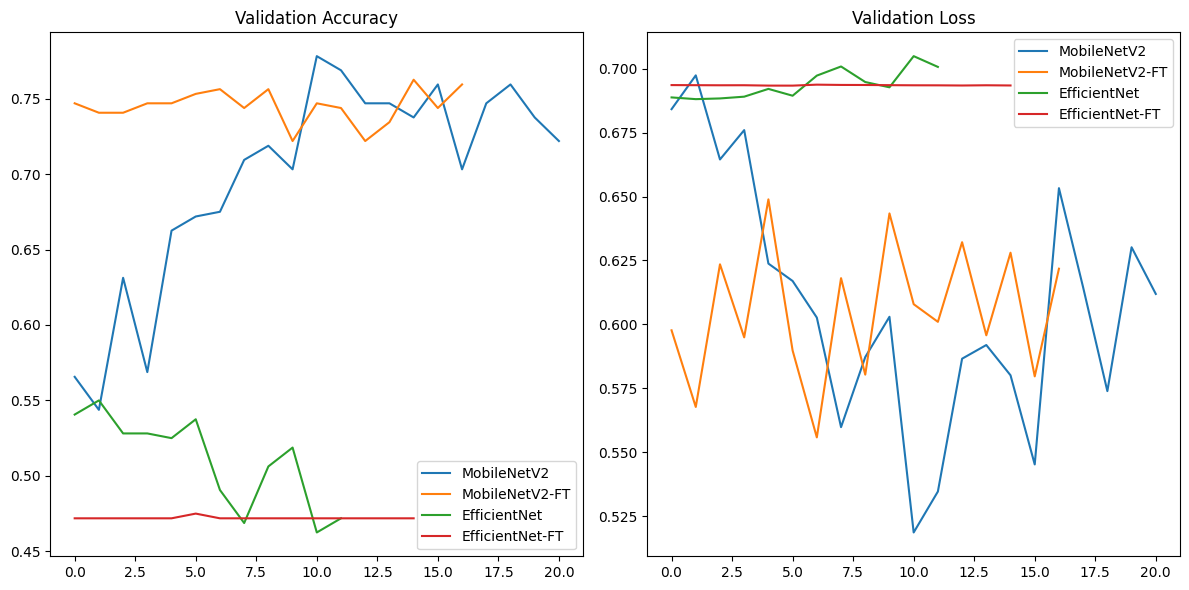

In [54]:
# Cell 12: Comparison
def compare_histories(histories, labels):
    plt.figure(figsize=(12, 6))
    
    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=label)
    plt.title('Validation Accuracy')
    plt.legend()
    
    # Loss comparison
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Validation Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Compare models
histories = [enhanced_history, fine_tune_history, effnet_history, effnet_finetune_history]
labels = ['MobileNetV2', 'MobileNetV2-FT', 'EfficientNet', 'EfficientNet-FT']
compare_histories(histories, labels)

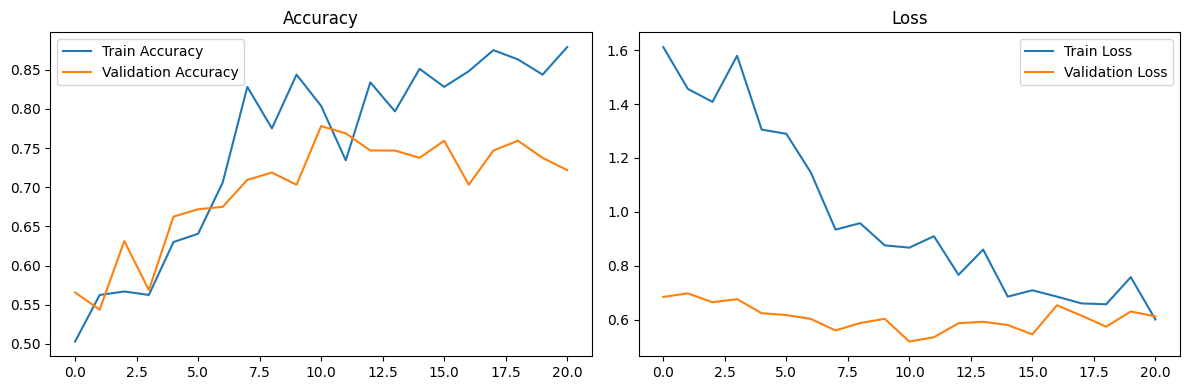

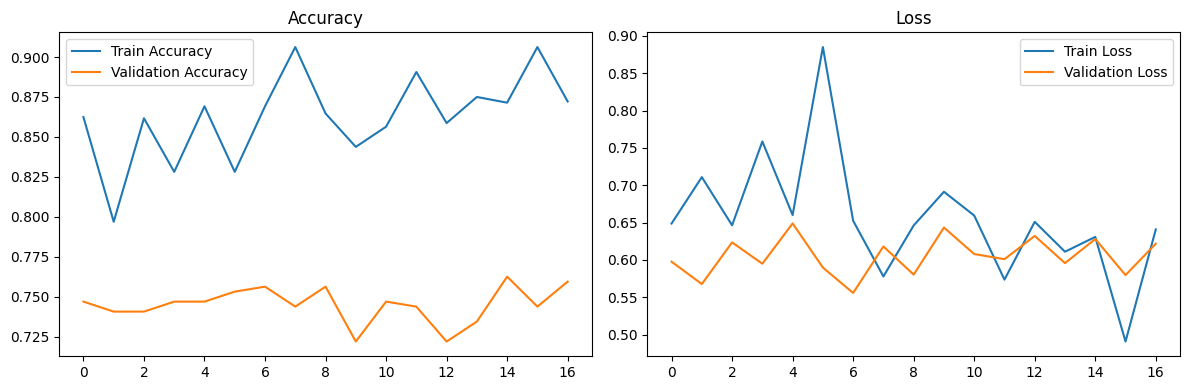

In [55]:
# After training, compare model histories
plot_training_history(enhanced_history)  # Use your existing plotting function
plot_training_history(fine_tune_history)

In [56]:
# Evaluate final model
enhanced_model.evaluate(test_generator)  # Use your test generator

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5015 - auc: 0.6733 - loss: 1.1920 - precision: 0.3900 - recall: 0.7573


[0.6905633211135864,
 0.7105262875556946,
 0.6912442445755005,
 0.9708737730979919,
 0.8668415546417236]

In [85]:
for i in histories:
    for k in labels:
            
        print(k, " hist:     ",i.history,"\n\n\n","-----------"*15)

MobileNetV2  hist:      {'accuracy': [0.5030075311660767, 0.5625, 0.5669173002243042, 0.5625, 0.630075216293335, 0.640625, 0.7060150504112244, 0.828125, 0.7751879692077637, 0.84375, 0.8037593960762024, 0.734375, 0.8338345885276794, 0.796875, 0.8511278033256531, 0.828125, 0.8481202721595764, 0.875, 0.8631578683853149, 0.84375, 0.878947377204895], 'auc': [0.5075104832649231, 0.5354679822921753, 0.5949668884277344, 0.5073529481887817, 0.6746227145195007, 0.6725490093231201, 0.7767024636268616, 0.9018218517303467, 0.8539901971817017, 0.8797653913497925, 0.8843863606452942, 0.8588235378265381, 0.9093580842018127, 0.9090908765792847, 0.9286211133003235, 0.9232648611068726, 0.9285266399383545, 0.9450980424880981, 0.9345216155052185, 0.9066470861434937, 0.9471065402030945], 'loss': [1.6113593578338623, 1.4559468030929565, 1.408134937286377, 1.5789685249328613, 1.3049519062042236, 1.2895017862319946, 1.1455458402633667, 0.9340047240257263, 0.9578947424888611, 0.8755982518196106, 0.8670334219932

In [84]:
for i in histories:
    for k in range(len(labels)):
            
        print(labels[k], " hist:     ",i.history,"\n\n\n","-----------"*15)

MobileNetV2  hist:      {'accuracy': [0.5030075311660767, 0.5625, 0.5669173002243042, 0.5625, 0.630075216293335, 0.640625, 0.7060150504112244, 0.828125, 0.7751879692077637, 0.84375, 0.8037593960762024, 0.734375, 0.8338345885276794, 0.796875, 0.8511278033256531, 0.828125, 0.8481202721595764, 0.875, 0.8631578683853149, 0.84375, 0.878947377204895], 'auc': [0.5075104832649231, 0.5354679822921753, 0.5949668884277344, 0.5073529481887817, 0.6746227145195007, 0.6725490093231201, 0.7767024636268616, 0.9018218517303467, 0.8539901971817017, 0.8797653913497925, 0.8843863606452942, 0.8588235378265381, 0.9093580842018127, 0.9090908765792847, 0.9286211133003235, 0.9232648611068726, 0.9285266399383545, 0.9450980424880981, 0.9345216155052185, 0.9066470861434937, 0.9471065402030945], 'loss': [1.6113593578338623, 1.4559468030929565, 1.408134937286377, 1.5789685249328613, 1.3049519062042236, 1.2895017862319946, 1.1455458402633667, 0.9340047240257263, 0.9578947424888611, 0.8755982518196106, 0.8670334219932